Correr cada linea es importante para ver la funcionalidad de los scripts.

In [3]:
import numpy as np
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
import itertools
import io
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from IPython.display import clear_output
from sklearn.neighbors import KernelDensity
from tabulate import tabulate
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS


# ANALISIS DE LOS DATOS

In [5]:
bankruptcy_data = pd.read_parquet('data/clean_data.parquet')
bankruptcy_data.head()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [6]:
bankruptcy_data.columns = bankruptcy_data.columns.str.lstrip()

In [7]:
bankruptcy_data.columns = [c.replace(' ', '_') for c in bankruptcy_data.columns]
bankruptcy_data.head()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


Dimensiones del dataset:

In [8]:
bankruptcy_data.shape

(6819, 96)

Mas informacion del dataset:

In [9]:
bankruptcy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6819 non-null   int64  
 1   1       6819 non-null   float64
 2   2       6819 non-null   float64
 3   3       6819 non-null   float64
 4   4       6819 non-null   float64
 5   5       6819 non-null   float64
 6   6       6819 non-null   float64
 7   7       6819 non-null   float64
 8   8       6819 non-null   float64
 9   9       6819 non-null   float64
 10  10      6819 non-null   float64
 11  11      6819 non-null   float64
 12  12      6819 non-null   float64
 13  13      6819 non-null   float64
 14  14      6819 non-null   float64
 15  15      6819 non-null   float64
 16  16      6819 non-null   float64
 17  17      6819 non-null   float64
 18  18      6819 non-null   float64
 19  19      6819 non-null   float64
 20  20      6819 non-null   float64
 21  21      6819 non-null   float64
 22  

In [10]:
bankruptcy_data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84',
       '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95'],
      dtype='object')

Ver si hay nulos:

In [11]:
bankruptcy_data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
91    0
92    0
93    0
94    0
95    0
Length: 96, dtype: int64

Distribución de las clases:

0    6599
1     220
Name: 0, dtype: int64


<AxesSubplot:xlabel='0', ylabel='count'>

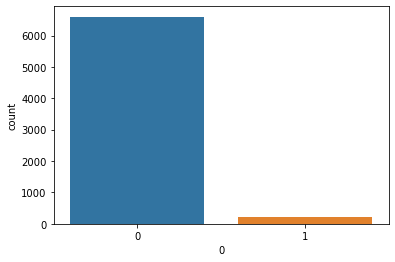

In [13]:
print(bankruptcy_data['0'].value_counts())
sns.countplot(x=bankruptcy_data['0'])

Separacion de X y Y:

In [14]:
X = bankruptcy_data.drop('0', axis=1).values
Y = bankruptcy_data['0'].values
print (X.shape , Y.shape)
#1

(6819, 95) (6819,)


In [16]:
Y

array([1, 1, 1, ..., 0, 0, 0])

In [17]:
X

array([[0.37059426, 0.42438945, 0.40574977, ..., 0.56405011, 1.        ,
        0.01646874],
       [0.46429094, 0.53821413, 0.51673002, ..., 0.57017495, 1.        ,
        0.02079431],
       [0.42607127, 0.49901875, 0.47229509, ..., 0.56370608, 1.        ,
        0.01647411],
       ...,
       [0.47272461, 0.533744  , 0.52063815, ..., 0.5651584 , 1.        ,
        0.09764874],
       [0.50626432, 0.5599106 , 0.55404465, ..., 0.56530151, 1.        ,
        0.04400945],
       [0.49305319, 0.57010467, 0.54954762, ..., 0.56516694, 1.        ,
        0.23390224]])

Separacion de test y train: (Para probar codigos y disminuir tiempo de ejecucion)





In [18]:
#Para pruebas con modelos complicados
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.01, random_state=0)
print (X_test.shape , Y_test.shape)

(69, 95) (69,)


Funcion para graficar matriz de confusion:



In [19]:
  #NORMALIZAR
def calcularMatrizCF(matris,titulo):
    a = (matris[0,0] +  matris[0,1])
    b = (matris[1,0] +  matris[1,1])
    matris[0,0] =  matris[0,0] / a
    matris[0,1] =  matris[0,1] / a
    matris[1,0] =  matris[1,0] / b
    matris[1,1] =  matris[1,1] / b
    #MATRIZ DE CONFUSION
    sns.heatmap(matris,annot=True)
    plt.xlabel('Label Predicha')
    plt.ylabel('Label Verdadera')
    plt.title(titulo)
    print(matris)

# GBT (Gradient Boosting Tree)



In [20]:
def experimentar_gbt(num_trees, X, Y):
    folds = 10
    skf = KFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    conf_matrix_list_of_arrays = np.zeros(2)
    for trees in num_trees:
        ## para almacenar los errores intermedios
        EficienciaTrain = []
        EficienciaVal = []
        accuracy = []
        Macc = []
        Mpre = []
        Mrec = []
        Mf1 = []
        j = 0
        for train, test in skf.split(X, Y):
            Xtrain = X[train,:]
            Ytrain = Y[train]
            Xtest = X[test,:]
            Ytest = Y[test]
            #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
            modelo= GradientBoostingClassifier(n_estimators=trees)
            modelo.fit(Xtrain,Ytrain)
            conf_matrix = confusion_matrix(Ytest, modelo.predict(Xtest))
            conf_matrix_list_of_arrays = conf_matrix_list_of_arrays + conf_matrix
            #predecir muestras de entrenamiento
            Ytrain_pred =  modelo.predict(Xtrain)
            #predecir muestras de pruebas
            Yest = modelo.predict(Xtest)
            #Evaluamos las predicciones del modelo con los datos de test
            EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain.ravel()))
            EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))
            accuracy.append(modelo.score(Xtest, Ytest))
            Macc.append(accuracy_score(Ytest, Yest))
            Mpre.append(precision_score(Ytest, Yest))
            Mrec.append(recall_score(Ytest, Yest))
            Mf1.append(f1_score(Ytest, Yest))

        resultados.loc[idx,'número de arboles'] = trees
        resultados.loc[idx,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
        resultados.loc[idx,'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
        resultados.loc[idx,'eficiencia de prueba'] = np.mean(EficienciaVal)
        resultados.loc[idx,'Intervalo de confianza (prueba)'] = np.std(EficienciaVal)
        resultados.loc[idx,'accuracy real'] = np.mean(Macc)
        resultados.loc[idx,'precision_score'] = np.mean(Mpre)
        resultados.loc[idx,'recall_score'] = np.mean(Mrec)
        resultados.loc[idx,'f1_score'] = np.mean(Mf1)
        idx= idx +1
        
    return (resultados, conf_matrix_list_of_arrays)

Resultados para el GBT

In [21]:
arboles = [200]
resultados_gbt, matris = experimentar_gbt(arboles, X, Y)
resultados_gbt

,número de arboles,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,Intervalo de confianza (prueba),accuracy real,precision_score,recall_score,f1_score
0,200.0,0.997588,0.000898,0.963046,0.023928,0.963046,0.389875,0.253613,0.286081


In [ ]:
arboles = [500]
resultados_gbt, matris = experimentar_gbt(arboles, X, Y)
resultados_gbt

Mejor resultado GBT

In [ ]:
arboles = [5,10,20]
resultados_gbt, matrisGBT = experimentar_gbt(arboles, X, Y)
resultados_gbt

Matriz de confusión GBT

[[0.98878618 0.01121382]
 [0.7        0.3       ]]


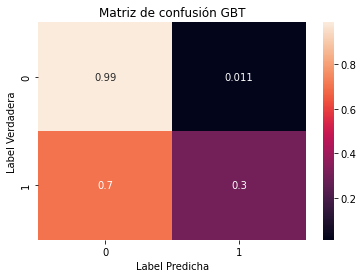

In [27]:
calcularMatrizCF(matris, "Matriz de confusión GBT")

# SVM (Support Vector Machine)

In [ ]:
#ejercicio de código
def experiementarSVC(x, y, kernels, gammas,params_reg):
    idx = 0
    kf = KFold(n_splits=10) 
    # crear una lista con la combinaciones de los elementos de cada list
    kernels_gammas_regs = list(itertools.product(kernels, gammas, params_reg))
    resultados = pd.DataFrame()
    conf_matrix_list_of_arrays = np.zeros(2)
    for params in kernels_gammas_regs:
        kernel, gamma, param_reg = params
        ''' print("parametros usados", params) # puede usar para ver los params '''
        errores_train = []
        errores_test = []
        EficienciaVal = []
        pct_support_vectors = []
        Macc = []
        Mpre = []
        Mrec = []
        Mf1 = []
        for train_index, test_index in kf.split(x,y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]  
            # normalizar los datos
            scaler = StandardScaler().fit(X= X_train)  
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
            svm = SVC(kernel=kernel, gamma=gamma, C= param_reg)
            # Entrenar el modelo
            svm.fit(X=X_train, y=y_train)
            # calculo de errores
            y_train_pred = svm.predict(X=X_train)
            y_test_pred = svm.predict(X=X_test)
            conf_matrix = confusion_matrix(y_test, svm.predict(X_test))
            conf_matrix_list_of_arrays = conf_matrix_list_of_arrays + conf_matrix
            # error y pct de vectores de soporte
            errores_train.append(accuracy_score(y_true = y_train, y_pred = y_train_pred))
            errores_test.append(accuracy_score(y_true = y_test, y_pred = y_test_pred))
            # contar muestras de entrenamiento
            n_train = X_train.shape[0]
            pct_vs = ( svm.support_vectors_.shape[0] /n_train)
            pct_support_vectors.append(pct_vs)
            #ypredict.append((y_test_pred))
            #ytesetes.append((y_test))
            Macc.append(accuracy_score(y_test, y_test_pred))
            Mpre.append(precision_score(y_test, y_test_pred))
            Mrec.append(recall_score(y_test, y_test_pred))
            Mf1.append(f1_score(y_test, y_test_pred))
            EficienciaVal.append(np.mean(y_test_pred.ravel() == y_test.ravel()))

    
        resultados.loc[idx,'kernel'] = kernel
        resultados.loc[idx,'gamma'] = gamma
        resultados.loc[idx,'param_reg'] = param_reg
        resultados.loc[idx,'error de entrenamiento'] = np.mean(errores_train)
        resultados.loc[idx,'error de prueba'] = np.mean(errores_test)
        resultados.loc[idx,'% de vectores de soporte'] = np.mean(pct_support_vectors)*100
        resultados.loc[idx,'accuracy real'] = np.mean(Macc)
        resultados.loc[idx,'Intervalo de confianza (prueba)'] = np.std(EficienciaVal)
        resultados.loc[idx,'precision_score'] = np.mean(Mpre)
        resultados.loc[idx,'recall_score'] = np.mean(Mrec)
        resultados.loc[idx,'f1_score'] = np.mean(Mf1)
        
        idx+=1
    return (resultados, conf_matrix_list_of_arrays)

Resultados SVM

In [ ]:
# vamos a realizar los experimentos
resultadosSVC, matrisSVM = experiementarSVC(x =X ,y=Y,
                                 kernels=['linear', 'rbf'],
                                 gammas = [0.01,0.1],
                                 params_reg = [0.001, 0.01,0.1, 1,10]
                                )

resultadosSVC


,kernel,gamma,param_reg,error de entrenamiento,error de prueba,% de vectores de soporte,accuracy real,Intervalo de confianza (prueba),precision_score,recall_score,f1_score
0,linear,0.01,0.001,0.921363,0.920489,32.218705,0.920489,0.008488,0.913842,0.946836,0.929987
1,linear,0.01,0.010,0.926097,0.924921,20.756820,0.924921,0.007334,0.918782,0.949391,0.933785
2,linear,0.01,0.100,0.928388,0.927001,18.101412,0.927001,0.006759,0.924212,0.946793,0.935324
3,linear,0.01,1.000,0.928690,0.927001,17.752649,0.927001,0.006541,0.924343,0.946621,0.935304
4,linear,0.01,10.000,0.928609,0.927001,17.704405,0.927001,0.006126,0.924593,0.946294,0.935277
5,linear,0.10,0.001,0.921363,0.920489,32.218705,0.920489,0.008488,0.913842,0.946836,0.929987
6,linear,0.10,0.010,0.926097,0.924921,20.756820,0.924921,0.007334,0.918782,0.949391,0.933785
7,linear,0.10,0.100,0.928388,0.927001,18.101412,0.927001,0.006759,0.924212,0.946793,0.935324
8,linear,0.10,1.000,0.928690,0.927001,17.752649,0.927001,0.006541,0.924343,0.946621,0.935304
9,linear,0.10,10.000,0.928609,0.927001,17.704405,0.927001,0.006126,0.924593,0.946294,0.935277


Mejor resultado SVM

In [ ]:
# vamos a realizar los experimentos
from sklearn.metrics import recall_score

resultadosSVC, matrisSVM  = experiementarSVC(x = X,y=Y,
                                 kernels=['rbf'],
                                 gammas = [0.01],
                                 params_reg = [10]
                                )
resultadosSVC

,kernel,gamma,param_reg,error de entrenamiento,error de prueba,% de vectores de soporte,accuracy real,Intervalo de confianza (prueba),precision_score,recall_score,f1_score
0,rbf,0.01,10.0,0.959103,0.950881,16.050052,0.950881,0.006395,0.945397,0.967834,0.956457


Matriz de confusión SVM

[[0.92956309 0.07043691]
 [0.03215852 0.96784148]]


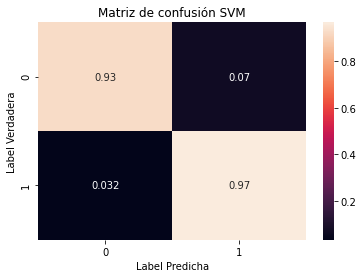

In [ ]:
calcularMatrizCF(matrisSVM, "Matriz de confusión SVM")


# RF (Random Forest)


In [ ]:
#ejercicio de código
def experimentar_rf(num_trees,numero_de_variables, X, Y):
    folds = 10
    skf = KFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    conf_matrix_list_of_arrays = np.zeros(2)
    for trees in num_trees:
        for num_variables in numero_de_variables:
            ## para almacenar los errores intermedios
            EficienciaTrain = []
            EficienciaVal = []
            Macc = []
            Mpre = []
            Mrec = []
            Mf1 = []
            for train, test in skf.split(X, Y):
                Xtrain = X[train,:]
                Ytrain = Y[train]
                Xtest = X[test,:]
                Ytest = Y[test]
                #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
                modelo = RandomForestClassifier(n_estimators=trees, max_features=num_variables, criterion="gini")
                modelo.fit(Xtrain,Ytrain)
                #predecir muestras de entrenamiento
                Ytrain_pred = modelo.predict(Xtrain)
                #predecir muestras de pruebas
                Yest = modelo.predict(Xtest)
                #Evaluamos las predicciones del modelo con los datos de test
                EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain.ravel()))
                EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))
                conf_matrix = confusion_matrix(Ytest, modelo.predict(Xtest))
                conf_matrix_list_of_arrays = conf_matrix_list_of_arrays + conf_matrix
                Macc.append(accuracy_score(Ytest, Yest))
                Mpre.append(precision_score(Ytest, Yest))
                Mrec.append(recall_score(Ytest, Yest))
                Mf1.append(f1_score(Ytest, Yest))



            resultados.loc[idx,'número de arboles'] = trees
            resultados.loc[idx,'variables para la selección del mejor umbral'] = num_variables
            resultados.loc[idx,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
            resultados.loc[idx,'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
            resultados.loc[idx,'eficiencia de prueba'] = np.mean(EficienciaVal)
            resultados.loc[idx,'Intervalo de confianza (prueba)'] = np.std(EficienciaVal)
            resultados.loc[idx,'accuracy real'] = np.mean(Macc)
            resultados.loc[idx,'precision_score'] = np.mean(Mpre)
            resultados.loc[idx,'recall_score'] = np.mean(Mrec)
            resultados.loc[idx,'f1_score'] = np.mean(Mf1)
            idx= idx +1
        print(f"termina para {trees} arboles")
        
    return (resultados, conf_matrix_list_of_arrays)

Resultados Random Forest

In [ ]:
arboles = [5,10,20,50,100, 150]
variables_seleccion = [5,10,15,20,25]
resultados_rf, matrisRF= experimentar_rf(arboles, variables_seleccion, X, Y)
resultados_rf

termina para 5 arboles
termina para 10 arboles
termina para 20 arboles
termina para 50 arboles
termina para 100 arboles
termina para 150 arboles


,número de arboles,variables para la selección del mejor umbral,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,Intervalo de confianza (prueba),accuracy real,precision_score,recall_score,f1_score
0,5.0,5.0,0.987567,0.000672,0.967703,0.012349,0.967703,0.963868,0.978969,0.971288
1,5.0,10.0,0.987467,0.000924,0.966977,0.014879,0.966977,0.964771,0.976464,0.970527
2,5.0,15.0,0.987597,0.000403,0.966797,0.014207,0.966797,0.964674,0.976317,0.970380
3,5.0,20.0,0.987296,0.000599,0.969060,0.010971,0.969060,0.967212,0.977760,0.972411
4,5.0,25.0,0.987587,0.000176,0.967250,0.012766,0.967250,0.965573,0.976143,0.970763
5,10.0,5.0,0.989246,0.000436,0.970597,0.012062,0.970597,0.968560,0.979079,0.973737
6,10.0,10.0,0.989105,0.000400,0.970778,0.011917,0.970778,0.968131,0.979854,0.973900
7,10.0,15.0,0.989035,0.000507,0.969240,0.012631,0.969240,0.967482,0.977748,0.972535
8,10.0,20.0,0.989135,0.000393,0.969149,0.013267,0.969149,0.966892,0.978246,0.972462
9,10.0,25.0,0.989035,0.000316,0.969421,0.012388,0.969421,0.968857,0.976653,0.972684


Mejor resultado Random Forest

In [ ]:
arboles = [50]
variables_seleccion = [5]
resultados_rf, matrisRF = experimentar_rf(arboles, variables_seleccion, X, Y)
resultados_rf

termina para 50 arboles


,número de arboles,variables para la selección del mejor umbral,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,Intervalo de confianza (prueba),accuracy real,precision_score,recall_score,f1_score
0,50.0,5.0,0.989879,0.000305,0.972135,0.01103,0.972135,0.968366,0.982164,0.975172


Matriz de confusión Random Forest

[[0.95957534 0.04042466]
 [0.01786584 0.98213416]]


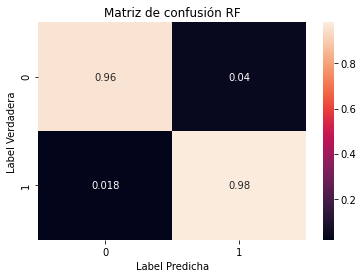

In [ ]:
calcularMatrizCF(matrisRF, "Matriz de confusión RF")